## Imports

In [1]:
from read_data import DataLoader
from data_eda import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data_loader = DataLoader()
data = data_loader.get_ingestor(".csv").ingest("C:\Documents\Code\TVaritAssignment2\DSData_Assignments 1.csv")

## EDA

##### Based on the problem statement the target variable DS_S needs to be analyzed based on the injection quantity of CAC2 and Manganese.

In [3]:
data.shape, data.index

((6697, 14), RangeIndex(start=0, stop=6697, step=1))

In [4]:
data.describe()

,HM_WT,Target_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME,DS_S
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6094.000000,6697.000000,6697.000000,6697.000000
mean,165.411229,0.004969,0.039572,4.562660,0.612587,0.066564,0.042735,354.522771,50.390623,1388.349688,9.372555,4.919068,0.007524
std,6.315830,0.001027,0.009874,0.053558,0.166054,0.014707,0.004797,59.711921,9.244264,37.644318,1.708239,1.196379,0.002783
min,140.000000,0.003000,0.011000,4.120000,0.186000,0.020000,0.013000,209.000000,0.000000,1226.000000,5.000000,0.000000,0.001000
25%,161.000000,0.005000,0.033000,4.540000,0.496000,0.057000,0.040000,318.000000,45.000000,1366.000000,8.000000,4.000000,0.005000
50%,165.000000,0.005000,0.038000,4.560000,0.586000,0.066000,0.042000,345.000000,49.000000,1389.000000,9.000000,5.000000,0.007000
75%,170.000000,0.005000,0.045000,4.590000,0.706000,0.075000,0.046000,380.000000,55.000000,1411.000000,10.000000,5.000000,0.009000
max,180.000000,0.012000,0.095000,4.770000,1.644000,0.145000,0.085000,1283.000000,198.000000,1574.000000,25.000000,15.000000,0.024000


In [5]:
data.describe(include=["O"])# Only single object column

,CASTNO
count,6697
unique,6697
top,V99790
freq,1


In [6]:
#Get the unique values in each column
for col in data.columns:
    print(col,data[col].nunique()) 

CASTNO 6697
HM_WT 40
Target_S 5
HM_S 77
HM_C 77
HM_SI 770
HM_TI 107
HM_MN 43
CAC2 353
MG 87
HM_TEMP 266
CAC2_INJ_TIME 19
MG_INJ_TIME 15
DS_S 24


###### TargetS has only five unique values, so it can be considered as a categorical variable.

### Visualizing Missing Values



Missing Values Count by Column:
HM_TEMP    603
dtype: int64

Visualizing Missing Values...


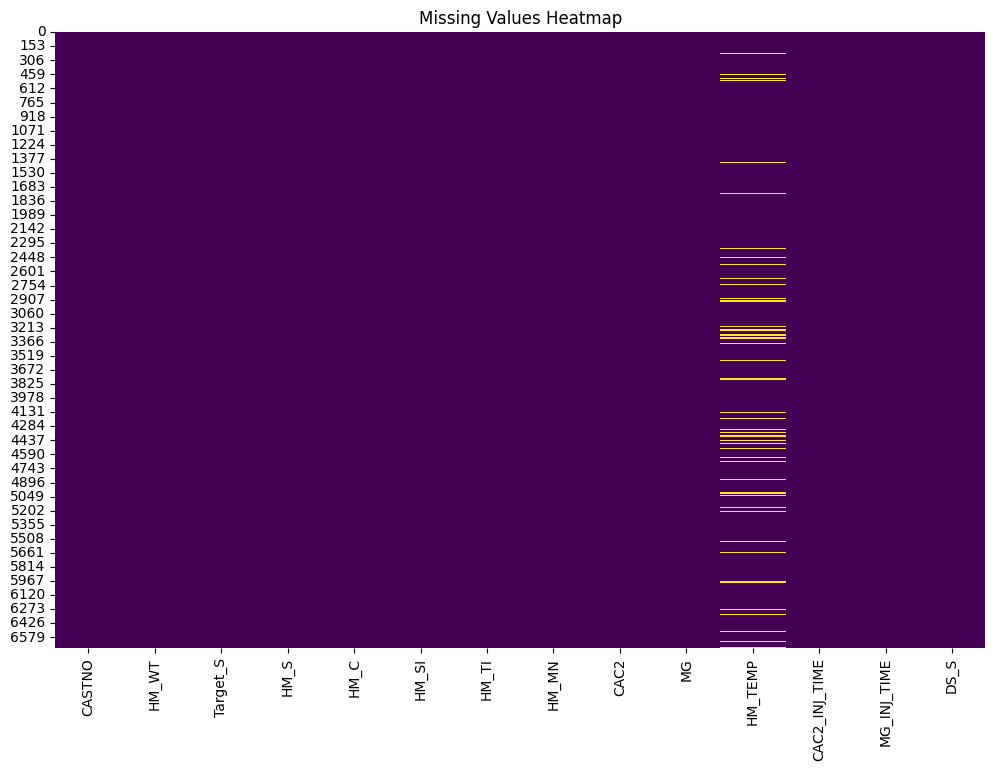

In [7]:
missing_value_analyzer = SimpleMissingValuesAnalysis()
missing_value_analyzer.analyze(data)

#####
One can conclude from this plot that there are only missing values in HM_temperature column and would need an fill strategy.

#### Univariate Analysis

In [8]:
# select numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=['O']).columns.tolist()

In [9]:
numerical_columns
categorical_columns
numerical_columns, categorical_columns

(['HM_WT',
  'Target_S',
  'HM_S',
  'HM_C',
  'HM_SI',
  'HM_TI',
  'HM_MN',
  'CAC2',
  'MG',
  'HM_TEMP',
  'CAC2_INJ_TIME',
  'MG_INJ_TIME',
  'DS_S'],
 ['CASTNO'])

##### Numerical Columns

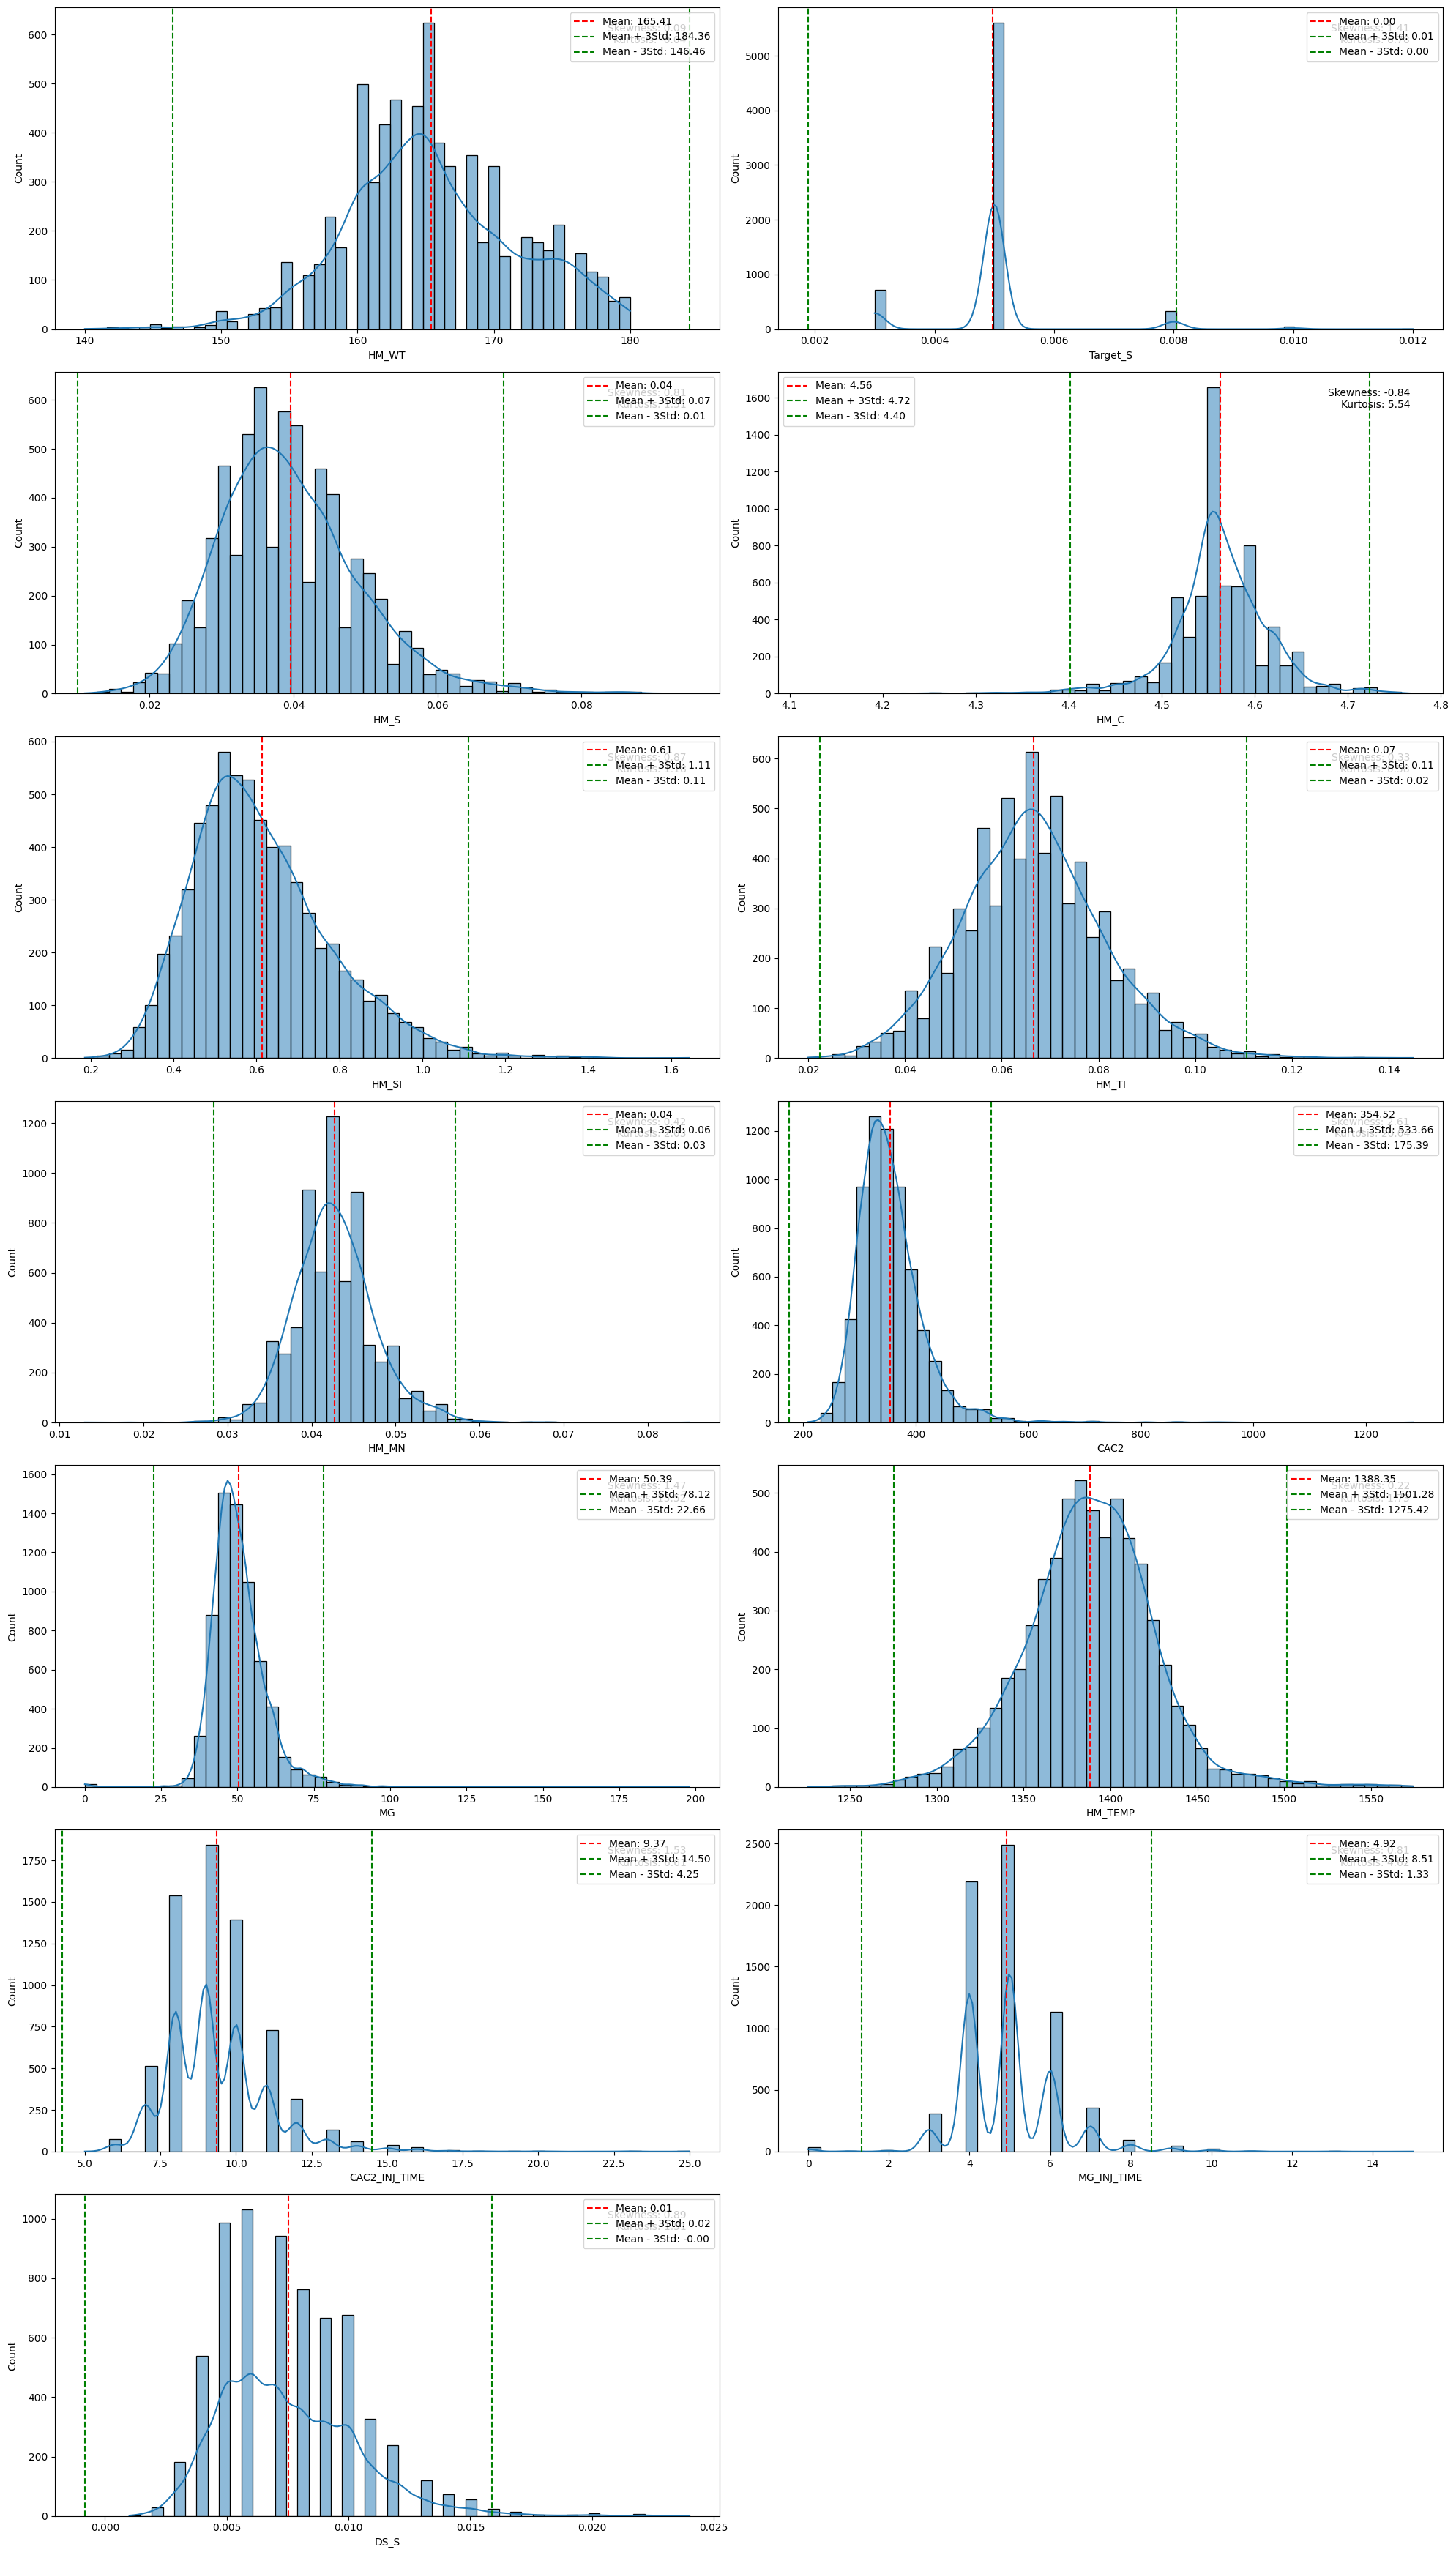

In [10]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())

# Calculate the number of rows needed
def plot_univariate_analysis(data, numerical_columns, univariate_analyzer):
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))

    for i, col in enumerate(numerical_columns):
        ax = axes[i // 2, i % 2]
        univariate_analyzer.execute_analysis(data, col, ax=ax)

    # Hide any unused subplots
    for j in range(i + 1, num_rows * 2):
        fig.delaxes(axes[j // 2, j % 2])

    plt.tight_layout()
    plt.show()

plot_univariate_analysis(data, numerical_columns, univariate_analyzer)

##### Numerical Columns
From the above plots, it can be concluded that the <b>CAC2, MG</b> columns are <b>highly positively skewed.</b>

<b>DS_S,CAC2_INJ_TIME, MG_INJ_TIME, HM_SI</b> are all <b>moderately positively skewed.</b>. There are also only a few unique values in these columns and can be considered as categorical values.

<b>HM_C</b> is negatively skewed. Rest of the columns are approximately normally distributed.

<b>Target_S</b> has only five unique values, so it can be considered as a categorical variable.

<b>HM_TEMP</b> can be filled with the median/mean value.

c:\Documents\Code\TVaritAssignment2\data_eda.py:275: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted", ax=ax)
c:\Documents\Code\TVaritAssignment2\data_eda.py:275: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted", ax=ax)
c:\Documents\Code\TVaritAssignment2\data_eda.py:275: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted", ax=ax)


Text(0.5, 1.0, 'MG_INJ_TIME')

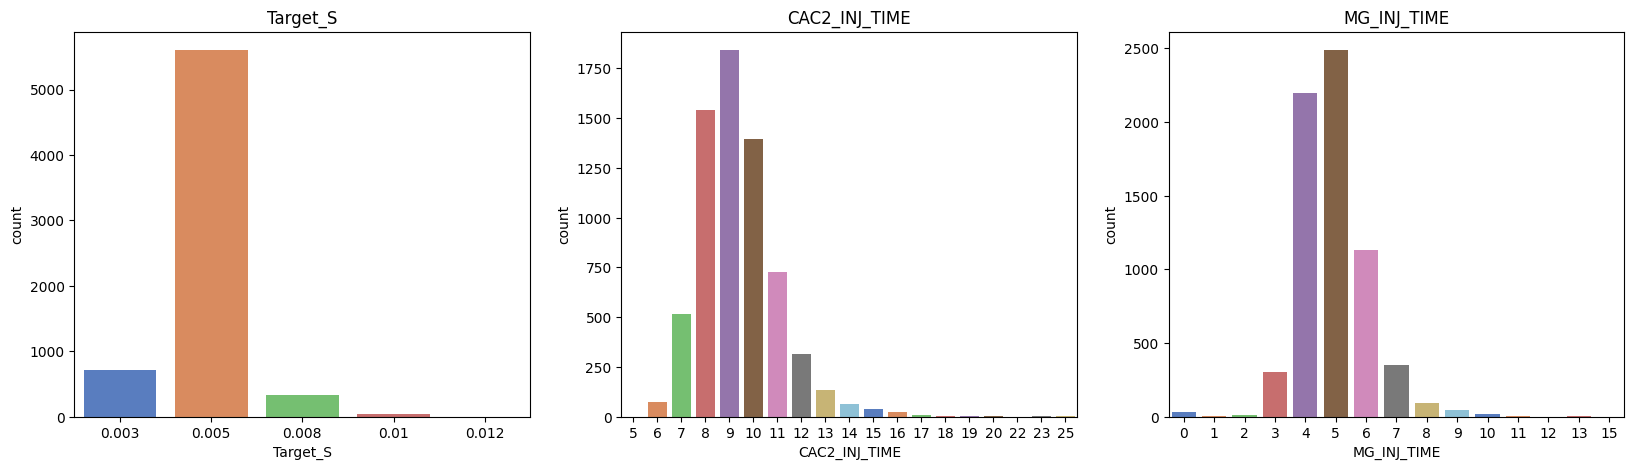

In [11]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
univariate_analyzer.execute_analysis(data, 'Target_S', ax=axes[0])
axes[0].set_title('Target_S')
univariate_analyzer.execute_analysis(data, 'CAC2_INJ_TIME', ax=axes[1])
axes[1].set_title('CAC2_INJ_TIME')
univariate_analyzer.execute_analysis(data, 'MG_INJ_TIME', ax=axes[2])
axes[2].set_title('MG_INJ_TIME')



##### Most of the values int the dataset are for the <b>Target_S=0.005</b> followed by <b>0.001</b> and <b>0.008</b>. The other values are very few in number.

For <b>CAC2_INJ_TIME</b> there are are about 20 values and for <b>MG_INJ_TIME</b> there are about 15  values.

A check can be considered for CAC2_INJ_TIME and MG_INJ_TIME columns to see if they are correlated with the target variable.

### Bivariate Analysis

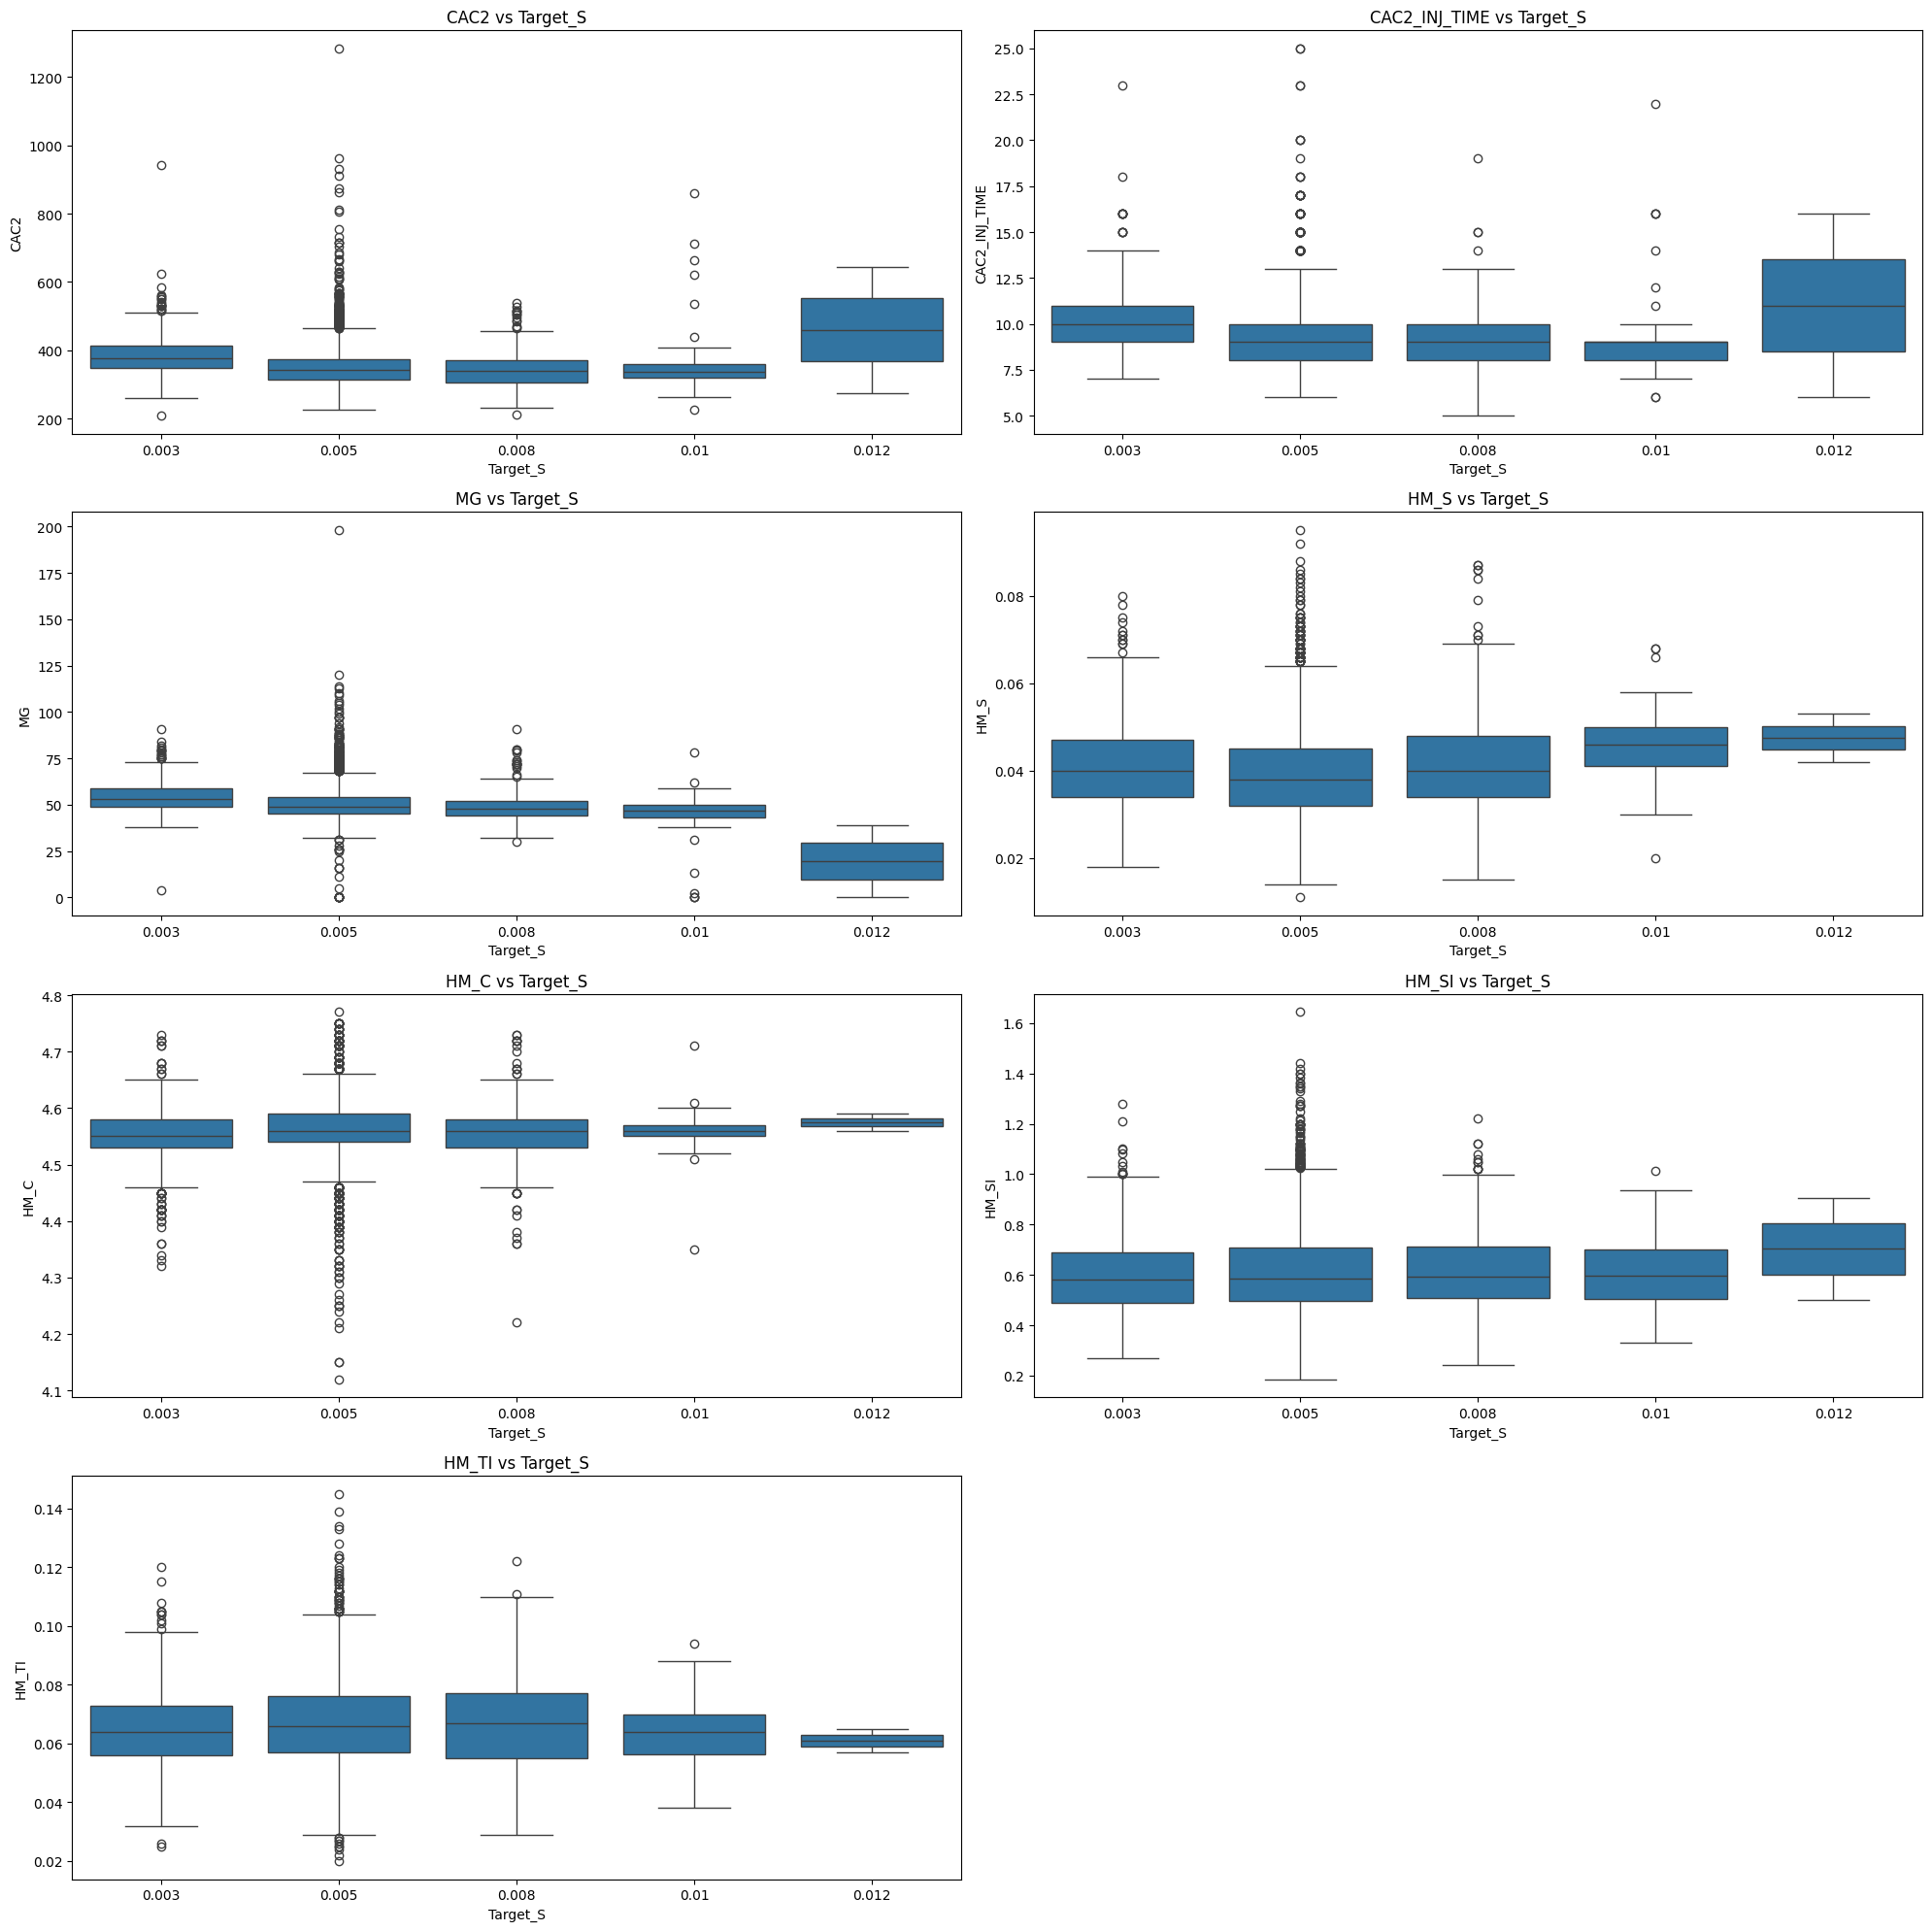

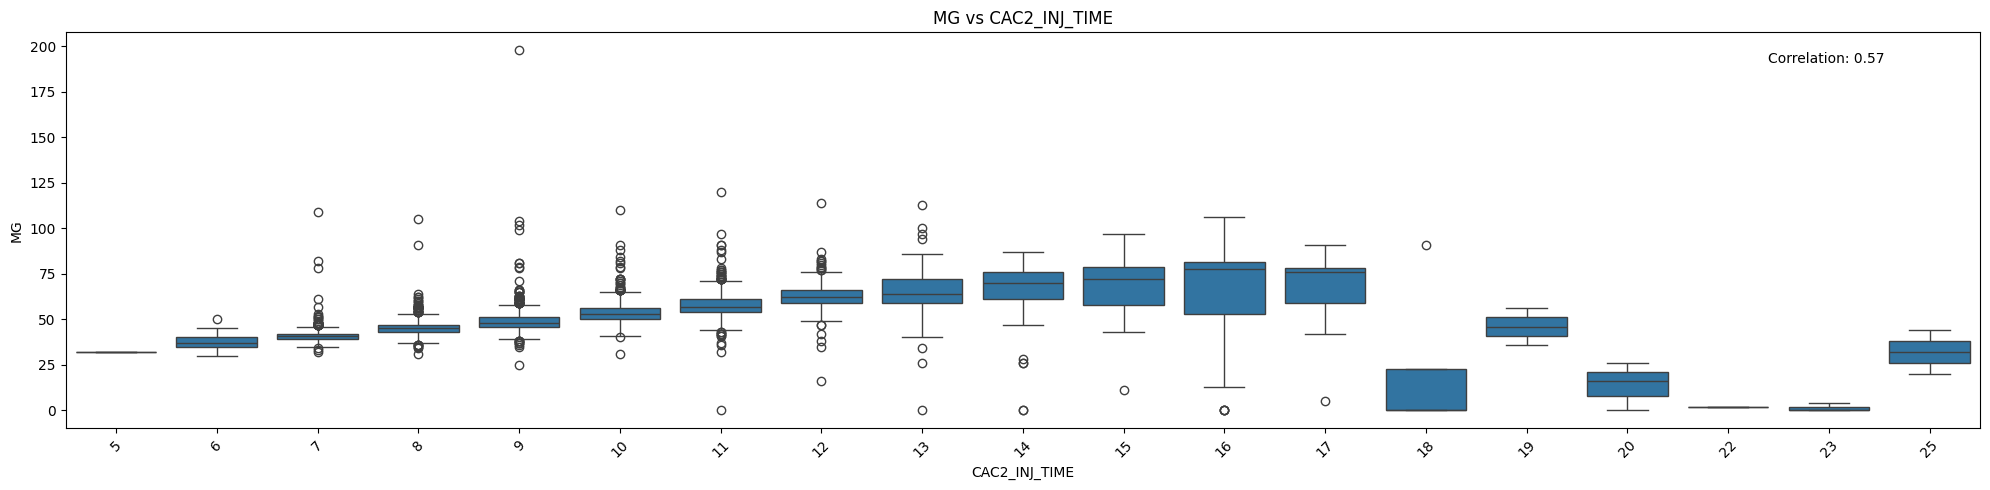

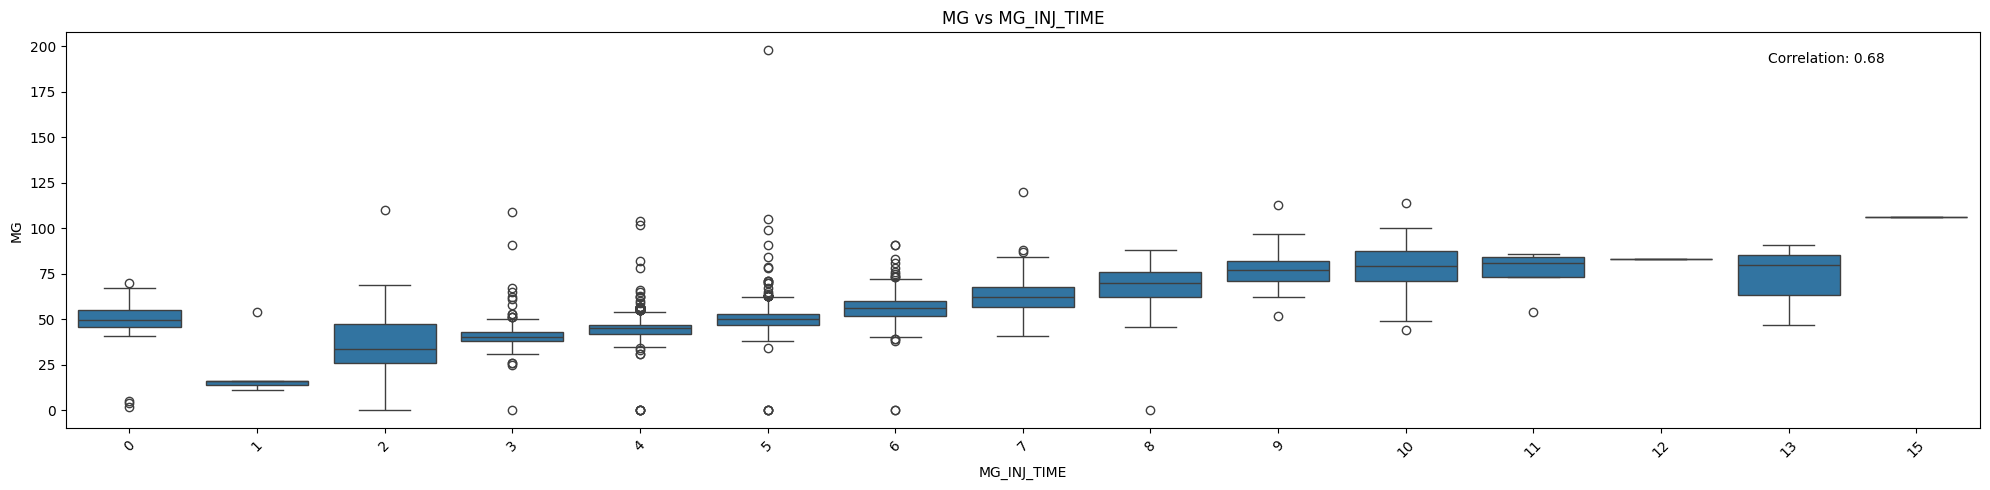

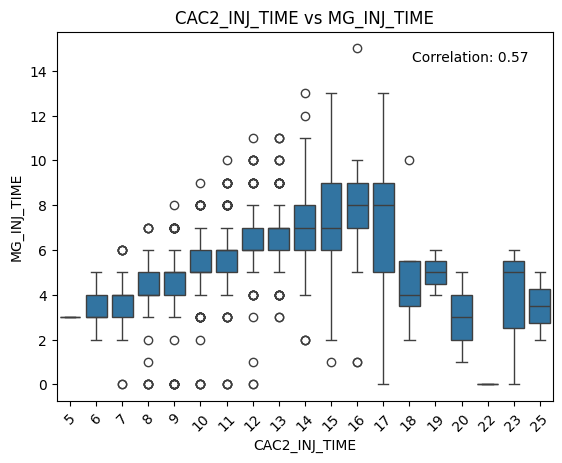

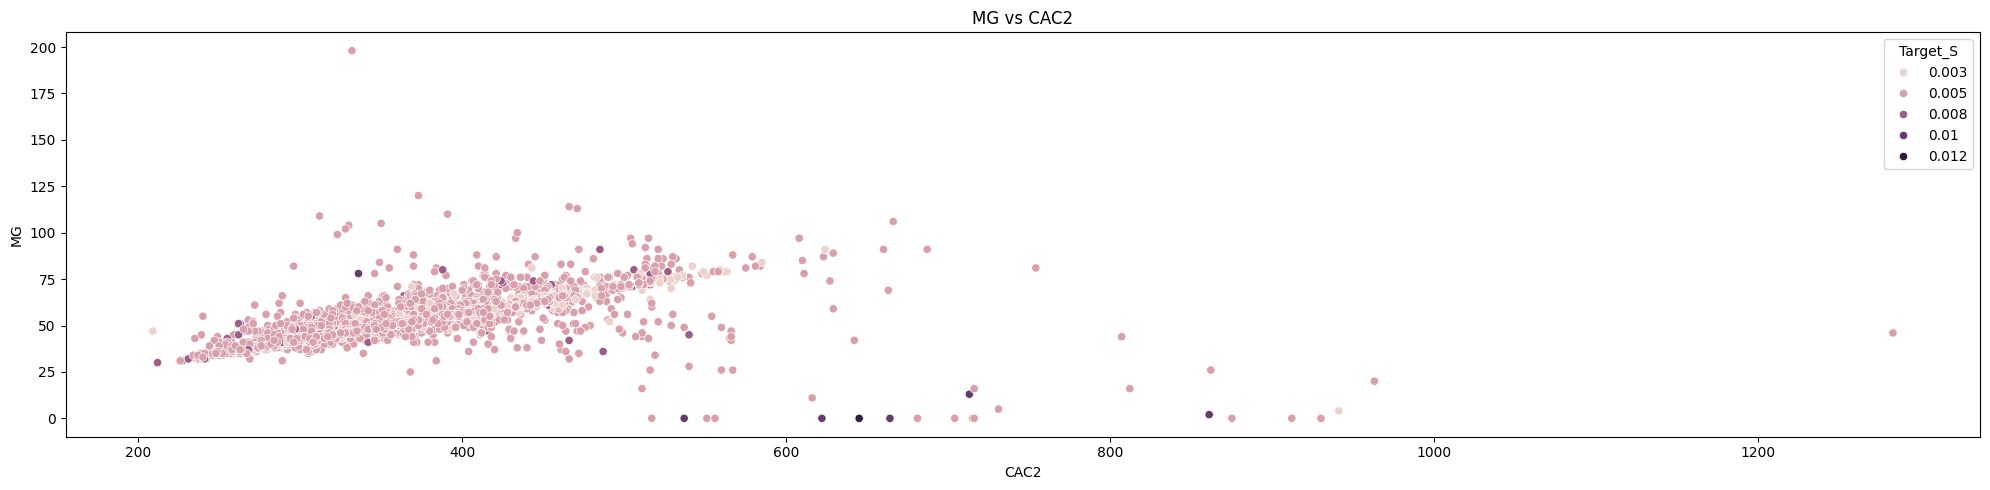

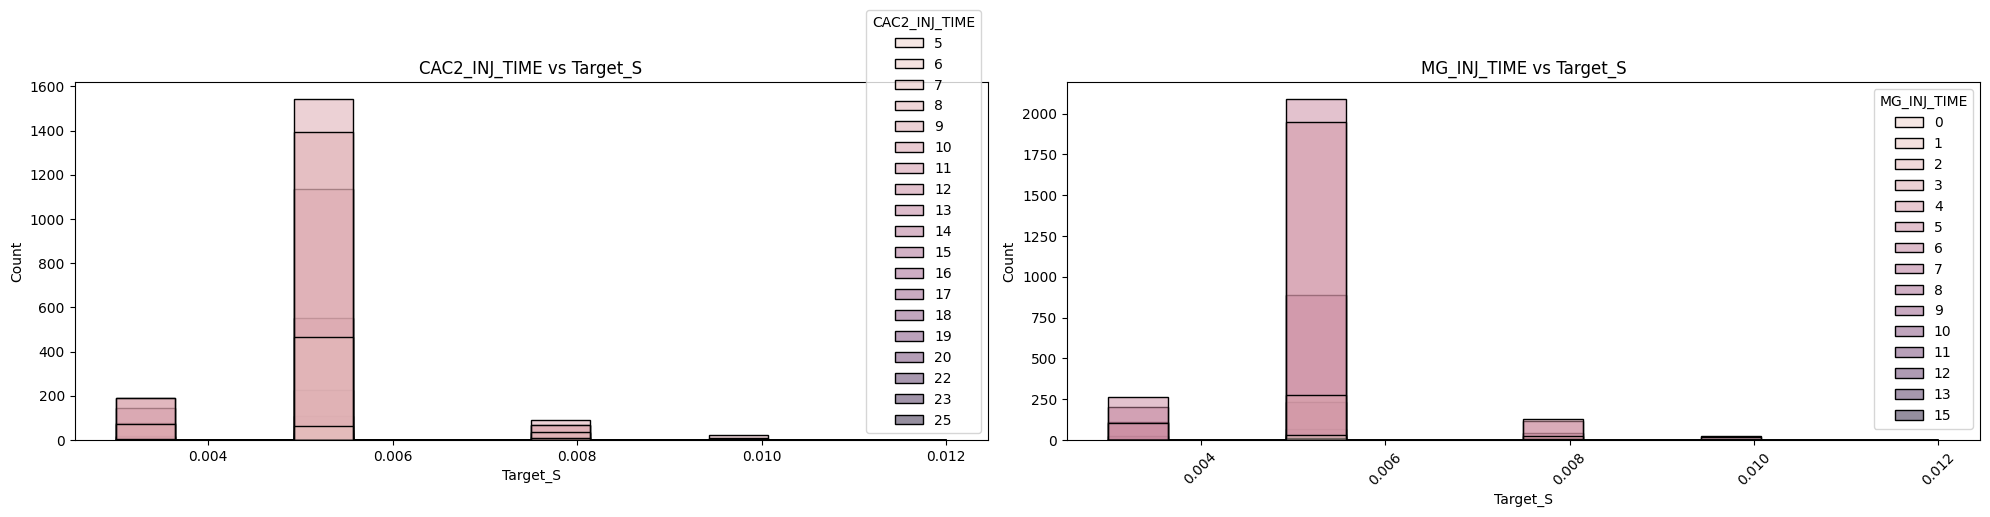

In [12]:
# Set the strategy to CategoricalVsNumericalAnalysis
bivariate_analyzer = BivariateAnalyzer(CategoricalVsNumericalAnalysis())
columns_to_analyze = ['CAC2', 'CAC2_INJ_TIME', 'MG', 'HM_S', 'HM_C', 'HM_SI', 'HM_TI']
# Ensure numerical columns are cast to the correct type
for col in columns_to_analyze:
    data[col] = pd.to_numeric(data[col], errors='coerce')

def plot_bivariate_analysis(data, columns_to_analyze, bivariate_analyzer, feature='Target_S', hue=None):    
    num_plots = len(columns_to_analyze)
    num_rows = (num_plots + 1) // 2

    if num_rows == 1:
        fig, axes = plt.subplots(1, num_plots, figsize=(20, 5))
        if num_plots == 1:
            axes = [axes]  # Ensure axes is iterable when there's only one plot
        for i, col in enumerate(columns_to_analyze):
            if hue is not None:
                bivariate_analyzer.execute_analysis(data, feature, col, ax=axes[i], hue=hue)
            else:
                bivariate_analyzer.execute_analysis(data, feature, col, ax=axes[i])
            axes[i].set_title(f'{col} vs {feature}')
        plt.tight_layout()
        plt.show()
        return

    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))

    for i, col in enumerate(columns_to_analyze):
        ax = axes[i // 2, i % 2]
        if hue is not None:
            bivariate_analyzer.execute_analysis(data, feature, col, ax=ax, hue=hue)
        else:
            bivariate_analyzer.execute_analysis(data, feature, col, ax=ax)
        ax.set_title(f'{col} vs {feature}')

    # Hide any unused subplots
    for j in range(i + 1, num_rows * 2):
        fig.delaxes(axes[j // 2, j % 2])

    plt.tight_layout()
    plt.show()


numerical_columns_to_analyze = ['MG']
plot_bivariate_analysis(data, columns_to_analyze, bivariate_analyzer)
plot_bivariate_analysis(data, numerical_columns_to_analyze, bivariate_analyzer, feature='CAC2_INJ_TIME')
plot_bivariate_analysis(data, numerical_columns_to_analyze, bivariate_analyzer, feature='MG_INJ_TIME')
bivariate_analyzer.execute_analysis(data, 'CAC2_INJ_TIME', 'MG_INJ_TIME')
# Set the strategy to NumericalVsNumericalAnalysis
bivariate_analyzer.set_strategy(NumericalVsNumericalAnalysis())

# Execute the analysis for numerical vs numerical features
plot_bivariate_analysis(data, numerical_columns_to_analyze, bivariate_analyzer, feature='CAC2',hue='Target_S')

categorical_columns_to_analyze = ['CAC2_INJ_TIME', 'MG_INJ_TIME']
bivariate_analyzer.set_strategy(CategoricalVsCategoricalAnalysis())
# Execute the analysis for categorical vs categorical features
plot_bivariate_analysis(data, categorical_columns_to_analyze, bivariate_analyzer, feature='Target_S')

##### With respect to Target_S most of the parameters seem to have a similar distribution across the different values of Target_S.

<b>CAC2_INJ_TIME Vs MG_INJ_TIME</b> Seem to increase linearly till a certain point(17s) and then decrease.However, there is a limited number of values to support this claim. Same trend can be observed for <b>CAC2 Vs MG</b>.

### Multi-variate Analysis

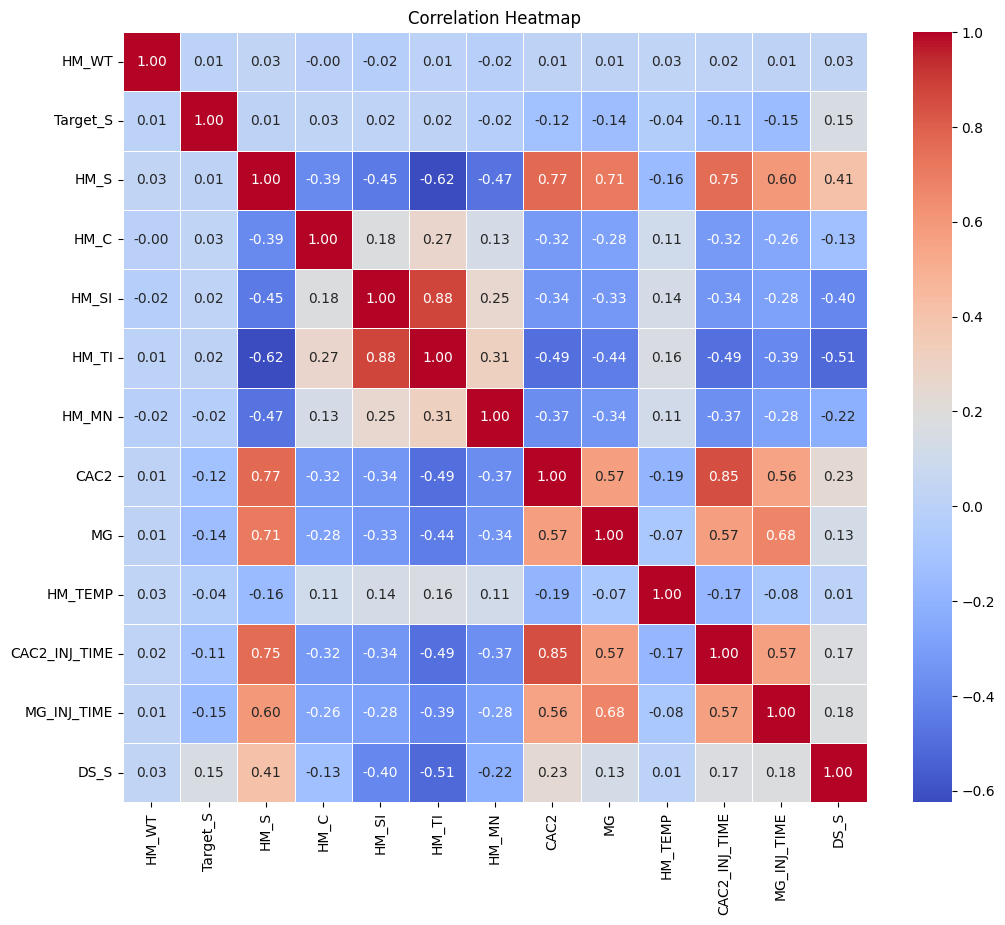

In [13]:
multivariate_analyzer = SimpleMultivariateAnalysis()
multivariate_analyzer.generate_correlation_heatmap(data[numerical_columns])

In [14]:
# multivariate_analyzer.generate_pairplot(data.iloc[:,1:], hue='Target_S')

##### From the correlation plot one can clearly see strong corelation between <b>(HM_SI,HM_TI), (CAC2_INJ_TIME, CAC2), (MG_INJ_TIME, MG), (CAC2, MG), (CAC2, MG_INJ_TIME),  (MG, MG_INJ_TIME)</b>. The dependency between CAC2 and MG is expected.  

##### The positive correlation between <b>HM_S and CAC2, MG</b> is also high which makes sense as more DS compounds are added in order to remove sulphur from the final product.

Other important observation is higher that the correlation between <b>HM_S</b> and other hot metal(Si,Ti,C,Mn) components is negatively correlated


### Preprocessing

##### Based on the above analysis the following steps can be taken:
1. Fill the missing values in <b>HM_TEMP</b> with the median value.
2. Apply log transformation to the columns <b>CAC2, MG</b> to reduce the skewness.
3. Optional: Add a feature column to describe ratio of <b>CAC2/MG</b> and <b>CAC2_INJ_TIME/MG_INJ_TIME</b>
4. Optional:Drop the columns <b>CAC2, MG</b> and <b>CAC2_INJ_TIME, MG_INJ_TIME</b>.
5. Apply strategies for handling outliers in each column
6. Apply one-hot encoding to the categorical columns.
7. Split the data into train and test sets.
8. Apply scaling to the numerical columns.


In [15]:
from preprocessing import *
import smogn

In [16]:
# Set Target_S as categorical
data['Target_S'] = data['Target_S'].astype('category')
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['HM_WT',
 'HM_S',
 'HM_C',
 'HM_SI',
 'HM_TI',
 'HM_MN',
 'CAC2',
 'MG',
 'HM_TEMP',
 'CAC2_INJ_TIME',
 'MG_INJ_TIME',
 'DS_S']

In [17]:
data= data.drop(columns=['CASTNO'])
categorical_columns = data.select_dtypes(include=['O', "category"]).columns.tolist()

In [18]:
# Fill HM_Temp missing values with mean
missing_value_handler = MissingValueHandler(FillMissingValuesStrategy(method='mean'))
data['HM_TEMP'] = missing_value_handler.handle_missing_values(data[['HM_TEMP']])['HM_TEMP']

2024-12-08 18:04:18,611 - INFO - Executing missing value handling strategy.
2024-12-08 18:04:18,612 - INFO - Filling missing values using method: mean
2024-12-08 18:04:18,614 - INFO - Missing values filled.


In [19]:
cleaned_data = smogn.smoter(
    data,
    y='DS_S',
    k=5,
    pert=0.1
)

r_index: 100%|##########| 714/714 [00:00<00:00, 1188.43it/s]


In [20]:
cleaned_data = cleaned_data.dropna()

In [21]:
cleaned_data = cleaned_data.reset_index(drop=True)

In [22]:
columns_to_log_transform = ['CAC2', 'MG']
feature_engineering = FeatureEngineer(LogTransformation(features=columns_to_log_transform))
data_scaled = feature_engineering.apply_feature_engineering(cleaned_data)

2024-12-08 18:06:21,271 - INFO - Applying feature engineering strategy.
2024-12-08 18:06:21,271 - INFO - Applying log transformation to features: ['CAC2', 'MG']
2024-12-08 18:06:21,273 - INFO - Log transformation completed.


In [23]:
# # One hot encode the categorical columns
# feature_engineering.set_strategy(OneHotEncoding(features=categorical_columns))
# data_scaled = feature_engineering.apply_feature_engineering(data_scaled)


In [24]:
data_scaled.shape

(4977, 13)

In [25]:
# Handle Outliers
outlier_handler = OutlierDetector(IQROutlierDetection())
print(data.shape)
data_scaled[numerical_columns[:-1]] = outlier_handler.handle_outliers(data_scaled[numerical_columns[:-1]],method='remove')


2024-12-08 18:06:21,383 - INFO - Executing outlier detection strategy.
2024-12-08 18:06:21,384 - INFO - Detecting outliers using the IQR method.
2024-12-08 18:06:21,389 - INFO - Outliers detected using the IQR method.
2024-12-08 18:06:21,390 - INFO - Removing outliers from the dataset.
2024-12-08 18:06:21,391 - INFO - Outlier handling completed.


(6697, 13)


In [26]:
data_scaled= data_scaled.dropna()

In [27]:
data_scaled = data_scaled.reset_index(drop=True)

In [28]:
feature_engineering.set_strategy(MinMaxScaling(features=numerical_columns[:-1]))
data_scaled = feature_engineering.apply_feature_engineering(data_scaled)
data_scaled.shape

2024-12-08 18:06:21,508 - INFO - Switching feature engineering strategy.
2024-12-08 18:06:21,509 - INFO - Applying feature engineering strategy.
2024-12-08 18:06:21,509 - INFO - Applying Min-Max scaling to features: ['HM_WT', 'HM_S', 'HM_C', 'HM_SI', 'HM_TI', 'HM_MN', 'CAC2', 'MG', 'HM_TEMP', 'CAC2_INJ_TIME', 'MG_INJ_TIME'] with range (0, 1)
2024-12-08 18:06:21,514 - INFO - Min-Max scaling completed.


(4125, 13)

In [29]:
data_scaled.select_dtypes(include=[np.number]).skew()

HM_WT            0.178965
HM_S             0.208229
HM_C             0.072071
HM_SI            0.600765
HM_TI            0.271764
HM_MN            0.260466
CAC2             0.075147
MG               0.092000
HM_TEMP         -0.144010
CAC2_INJ_TIME    0.325337
MG_INJ_TIME      0.316584
DS_S             0.249695
dtype: float64

In [30]:
data_scaled.isna().sum()

HM_WT            0
Target_S         0
HM_S             0
HM_C             0
HM_SI            0
HM_TI            0
HM_MN            0
CAC2             0
MG               0
HM_TEMP          0
CAC2_INJ_TIME    0
MG_INJ_TIME      0
DS_S             0
dtype: int64

#### Model Building

In [31]:
from sklearn.model_selection import train_test_split
from build_model import *
from test_model import *

c:\Documents\Code\TVaritAssignment2\build_model.py:335: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ("rfe", rfe)
c:\Documents\Code\TVaritAssignment2\build_model.py:354: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ("rfe", rfe)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled.drop(columns=['DS_S']), data_scaled['DS_S'], test_size=0.2, random_state=42)

In [33]:
lr= ModelBuilder(LinearRegressionStrategy())

In [34]:
lr_pipeline = lr.build_model(X_train, y_train)

2024-12-08 18:06:22,719 - INFO - Building and training the model using the selected strategy.
2024-12-08 18:06:22,719 - INFO - Initializing Linear Regression model with scaling.
2024-12-08 18:06:22,720 - INFO - Training Linear Regression model.
2024-12-08 18:06:26,231 - INFO - Model training completed.


MSE: -0.003 (0.000)


In [35]:
lr_evaluate = ModelEvaluator(RegressionModelEvaluationStrategy())
evaluation = lr_evaluate.evaluate(model= lr_pipeline, X_test= X_test, y_test= y_test)

2024-12-08 18:06:26,255 - INFO - Evaluating the model using the selected strategy.
2024-12-08 18:06:26,256 - INFO - Predicting using the trained model.
2024-12-08 18:06:26,259 - INFO - Calculating evaluation metrics.
2024-12-08 18:06:26,261 - INFO - Model Evaluation Metrics: {'Mean Squared Error': 9.655695198172475e-06, 'R-Squared': 0.3983704865735628}


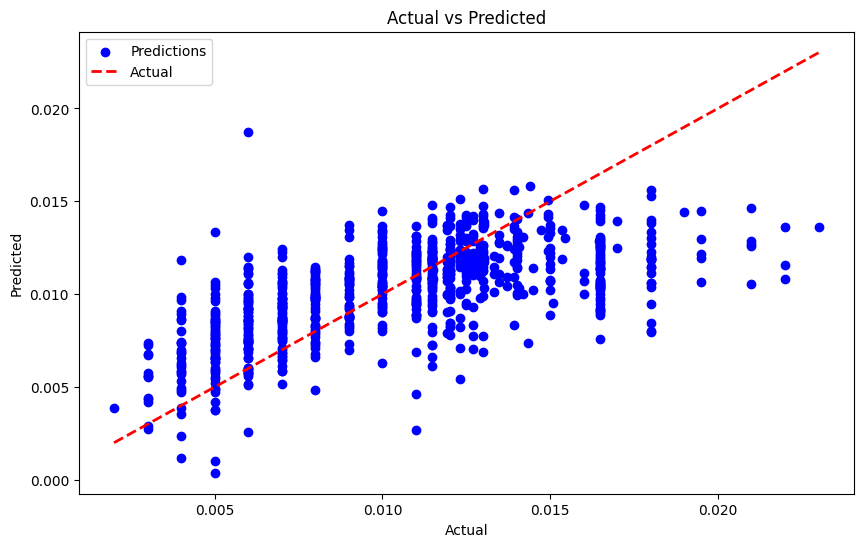

In [40]:
lr_evaluate.plot_predictions()


### Random Forest

2024-12-08 18:08:02,426 - INFO - Building and training the model using the selected strategy.
2024-12-08 18:08:02,427 - INFO - Initializing Random Forest Regression model with scaling.
2024-12-08 18:08:02,427 - INFO - Training Random Forest Regression model.
2024-12-08 18:08:25,804 - INFO - Model training completed.
2024-12-08 18:08:25,807 - INFO - Evaluating the model using the selected strategy.
2024-12-08 18:08:25,808 - INFO - Predicting using the trained model.
2024-12-08 18:08:25,827 - INFO - Calculating evaluation metrics.
2024-12-08 18:08:25,829 - INFO - Model Evaluation Metrics: {'Mean Squared Error': 7.90747352777291e-06, 'R-Squared': 0.5072991272708285}


neg_root_mean_squared_error: -0.003 (0.000)


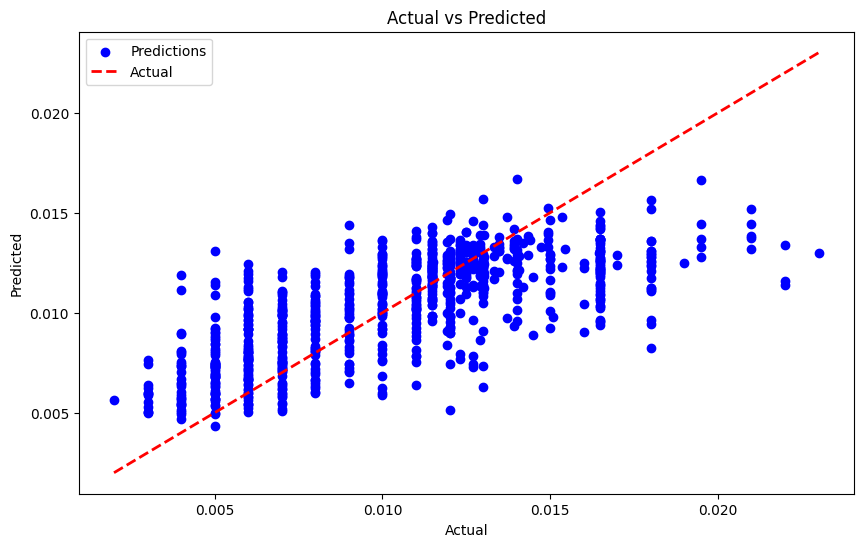

In [42]:
# Random Forest
rf = ModelBuilder(RandomForestRegressionStrategy())
rf_pipeline = rf.build_model(X_train, y_train)
rf_evaluate = ModelEvaluator(RegressionModelEvaluationStrategy())
evaluation = rf_evaluate.evaluate(model= rf_pipeline, X_test= X_test, y_test= y_test)
rf_evaluate.plot_predictions()


### XGBoost

2024-12-08 18:08:26,034 - INFO - Building and training the model using the selected strategy.
2024-12-08 18:08:26,035 - INFO - Initializing XGBoost Regression model.
2024-12-08 18:08:26,035 - INFO - Training XGBoost Regression model.
2024-12-08 18:08:27,518 - INFO - Model training completed.
2024-12-08 18:08:27,520 - INFO - Evaluating the model using the selected strategy.
2024-12-08 18:08:27,521 - INFO - Predicting using the trained model.
2024-12-08 18:08:27,530 - INFO - Calculating evaluation metrics.
2024-12-08 18:08:27,533 - INFO - Model Evaluation Metrics: {'Mean Squared Error': 7.202034160168797e-06, 'R-Squared': 0.5512538228958359}


neg_root_mean_squared_error: -0.003 (0.000)


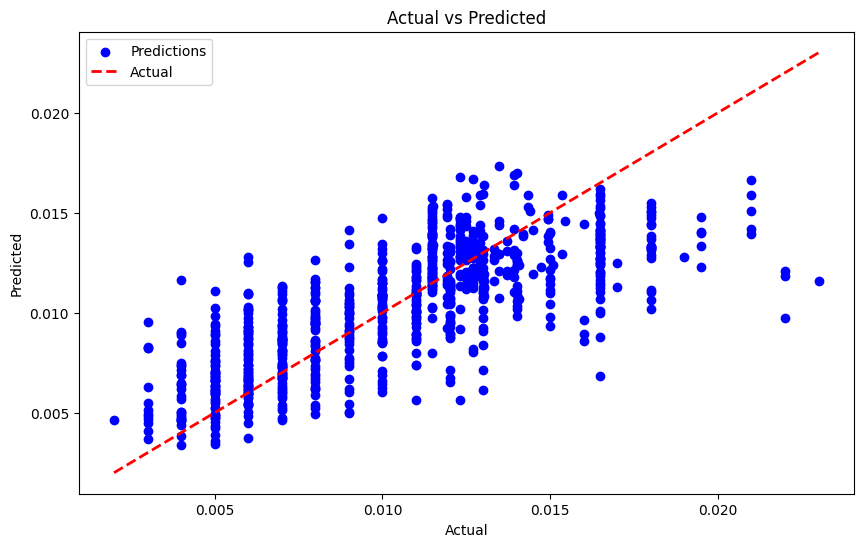

In [43]:
# Gradient Boosting

gb = ModelBuilder(XGBRegressionStrategy())
gb_pipeline = gb.build_model(X_train, y_train)
gb_evaluate = ModelEvaluator(RegressionModelEvaluationStrategy())
evaluation = gb_evaluate.evaluate(model= gb_pipeline, X_test= X_test, y_test= y_test)
gb_evaluate.plot_predictions()


### LightGBM

2024-12-08 18:13:54,710 - INFO - Building and training the model using the selected strategy.
2024-12-08 18:13:54,711 - INFO - Initializing LightGBM Regression model.
2024-12-08 18:13:54,711 - INFO - Training LightGBM Regression model.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 3300, number of used features: 12
[LightGBM] [Info] Start training from score 0.010107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1825
[LightGBM] [Info] Number of data points in the train set: 3300, number of used features: 11
[LightGBM] [Info] Start training from score 0.010107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1816
[LightGBM] [Info] Number of data points in the train set: 3300, number of used features: 10
[LightGBM] [Info] Start traini

2024-12-08 18:14:06,021 - INFO - Model training completed.
2024-12-08 18:14:06,022 - INFO - Evaluating the model using the selected strategy.
2024-12-08 18:14:06,023 - INFO - Predicting using the trained model.
2024-12-08 18:14:06,028 - INFO - Calculating evaluation metrics.
2024-12-08 18:14:06,031 - INFO - Model Evaluation Metrics: {'Mean Squared Error': 7.077309903690307e-06, 'R-Squared': 0.559025173606226}


neg_root_mean_squared_error: -0.003 (0.000)


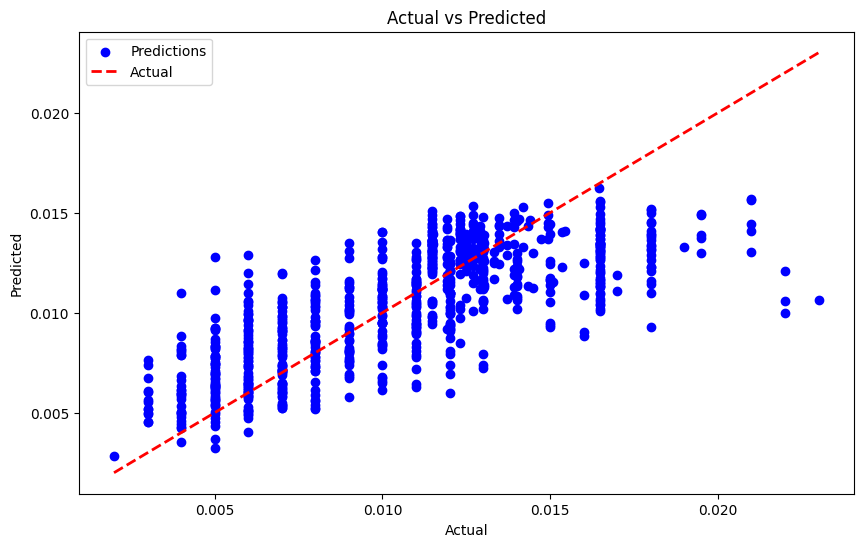

In [45]:
lgbm = ModelBuilder(LGBMRegressionStrategy())
lgbm_pipeline = lgbm.build_model(X_train, y_train)
lgbm_evaluate = ModelEvaluator(RegressionModelEvaluationStrategy())
evaluation = lgbm_evaluate.evaluate(model= lgbm_pipeline, X_test= X_test, y_test= y_test)

lgbm_evaluate.plot_predictions()


### CatBoost

In [ ]:
cat = ModelBuilder(CatBoostRegressionStrategy())
cat_pipeline = cat.build_model(X_train, y_train)
cat_evaluate = ModelEvaluator(RegressionModelEvaluationStrategy())
evaluation = cat_evaluate.evaluate(model= cat_pipeline, X_test= X_test, y_test= y_test)
cat_evaluate.plot_predictions()
cat_evaluate.plot_residuals()